# **Parkinson's Disease**

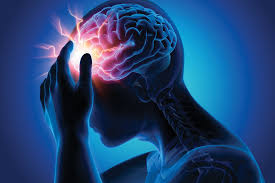

**🔍 What is Parkinson's Disease?**

Parkinson’s Disease is a chronic (long-term) and progressive brain disorder that mainly affects movement. It happens when certain nerve cells in the brain die, especially in an area called the substantia nigra.

These cells produce a chemical called dopamine, which helps control movement. When dopamine levels drop, a person starts having trouble moving normally.


---


**✅Main Symptoms:**

Tremor – Shaking, often in the hands or fingers.

Bradykinesia – Slowness of movement.

Rigidity – Stiff or tight muscles.

Postural Instability – Balance problems, frequent falls.


---


**⚠️ Factors That Increase the Risk of Parkinson’s Disease:**


1. Genetic Factors:

  * Having a family history of Parkinson’s increases risk






2. Environmental Factors:
  * Exposure to pesticides or herbicides (common in farming).

  * Drinking well water in rural areas.

  * Heavy metal exposure (like manganese or lead).

3. Age:
  * Parkinson’s is more common in people over 60 years old.

4. Head Injuries:
  * People with a history of traumatic brain injury (TBI) may have higher risk.

5. Other Health Conditions:
  * Diabetes

  * Hypertension (high blood pressure)

  * Depression

  * History of stroke


----



# 🧠 **Project Objective**

According to the World Health Organization (WHO), Parkinson’s Disease is a growing neurological disorder that significantly affects movement and quality of life, especially in older adults.

The Unified Parkinson’s Disease Rating Scale (UPDRS) is a standard clinical tool used to measure the severity and progression of Parkinson’s Disease — higher scores indicate more severe symptoms.

So,
We aim to build a predictive model that can estimate a patient’s UPDRS score based on clinical and health-related input features.
This can help in early detection, monitoring disease progression, and supporting doctors in treatment planning.



# **Importing libraries :-->**

In [ ]:
# For Numirecal Functions
import numpy as np
# For dataFrame Functions
import pandas as pd
# For Analysis & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# **Importing Data :-->**

In [ ]:
# Reading Data From CSV File
data=pd.read_csv('/content/parkinsons_disease_data_reg.csv')

# **Exploring Data :-->**

In [ ]:
# Knowing the number of Rows & Columns
data.shape

(2025, 23)

In [ ]:
# Knowing size of Data
data.size

46575

In [ ]:
# Exploring first 5 records from Data
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,DoctorInCharge,WeeklyPhysicalActivity (hr),MedicalHistory,Symptoms
0,3530,64,Female,Caucasian,NaN,31.243092,No,6.157042,4.331705,6.291197,112,91,214.074273,82.366509,25.542044,237.290807,4.161620,28.626480,5.355055,DrXXXConfid,04:14,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."
1,4848,79,Male,Asian,Higher,32.964518,No,5.192872,5.793078,8.603542,124,76,271.105498,176.637077,23.098051,150.130321,176.220403,20.310768,9.927998,DrXXXConfid,00:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."
2,4289,85,Male,Other,NaN,16.092385,No,9.920555,5.442308,8.894049,97,82,279.608808,198.444151,66.076197,66.871417,133.280607,20.614060,5.704308,DrXXXConfid,05:38,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine..."
3,4751,84,Female,Caucasian,High School,39.145792,Yes,18.875195,8.407833,8.300877,138,63,271.365480,134.669056,41.725854,248.163486,155.952027,4.237696,7.250435,DrXXXConfid,05:02,"{'FamilyHistoryParkinsons': 'Yes', 'TraumaticB...","{'Tremor': 'No', 'Rigidity': 'Yes', 'Bradykine..."
4,4242,59,Male,African American,NaN,15.987603,Yes,2.854129,5.797936,7.714292,169,101,293.662385,59.598420,23.251949,127.747693,49.523001,21.475758,6.119130,DrXXXConfid,00:08,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."


In [ ]:
# To see columns names
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'DoctorInCharge', 'WeeklyPhysicalActivity (hr)',
       'MedicalHistory', 'Symptoms'],
      dtype='object')

In [ ]:
# To see some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PatientID                    2025 non-null   int64  
 1   Age                          2025 non-null   int64  
 2   Gender                       2025 non-null   object 
 3   Ethnicity                    2025 non-null   object 
 4   EducationLevel               1651 non-null   object 
 5   BMI                          2025 non-null   float64
 6   Smoking                      2025 non-null   object 
 7   AlcoholConsumption           2025 non-null   float64
 8   DietQuality                  2025 non-null   float64
 9   SleepQuality                 2025 non-null   float64
 10  SystolicBP                   2025 non-null   int64  
 11  DiastolicBP                  2025 non-null   int64  
 12  CholesterolTotal             2025 non-null   float64
 13  CholesterolLDL    

In [ ]:
# To see some statistical information
data.drop('PatientID',axis=1).describe()

,Age,BMI,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,69.652346,27.162397,10.063892,4.896189,7.002411,133.815309,90.197037,226.805594,126.179968,59.613945,222.814905,101.519190,15.027270,4.990583
std,11.571040,7.222145,5.694348,2.874157,1.751285,26.586488,17.037746,43.717872,43.455005,23.464930,101.819477,56.513180,8.613916,2.935980
min,50.000000,15.008333,0.002228,0.000011,4.000497,90.000000,60.000000,150.062698,50.130454,20.027981,50.113604,0.028441,0.021191,0.001505
25%,60.000000,20.757513,5.160093,2.446423,5.501449,110.000000,75.000000,189.048799,88.815994,39.399494,132.520174,53.390605,7.469156,2.399154
50%,70.000000,27.119731,10.109640,4.788005,6.930472,133.000000,91.000000,228.464785,126.938405,59.182378,222.634972,102.715326,14.849281,4.976213
75%,80.000000,33.394469,14.858553,7.340610,8.560994,157.000000,105.000000,264.774192,164.103480,79.473546,311.541704,149.831682,22.530314,7.495758
max,89.000000,39.999887,19.988866,9.995864,9.999821,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697


In [ ]:
# To check dataType for each column
data.dtypes

,0
PatientID,int64
Age,int64
Gender,object
Ethnicity,object
EducationLevel,object
BMI,float64
Smoking,object
AlcoholConsumption,float64
DietQuality,float64
SleepQuality,float64


In [ ]:
# To check if there is duplication in data or not
data.duplicated().sum()

np.int64(0)

In [ ]:
# To know the total nulls in each column
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,374
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


**Cheking nulls in other shapr for NAN**

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,1030
Female,995


In [ ]:
data['Ethnicity'].value_counts()

,count
Ethnicity,
Caucasian,1222
African American,405
Other,205
Asian,193


In [ ]:
data['EducationLevel'].value_counts()

,count
EducationLevel,
High School,805
Bachelor's,632
Higher,214


In [ ]:
data['Smoking'].value_counts()

,count
Smoking,
No,1428
Yes,597


In [ ]:
EducationLevel = data[data['EducationLevel'].isnull()]
EducationLevel_nulls= EducationLevel['EducationLevel'].value_counts().sum()
EducationLevel_nulls

np.int64(0)

In [ ]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,374
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [ ]:
# calculate % of nulls in data

null_count = data['EducationLevel'].isnull().sum()

total_rows = len(data)

null_percentage = (null_count / total_rows) * 100
print(f"Percentage of nulls in Edu_level column : {null_percentage:.2f}%")

Percentage of nulls in Edu_level column : 18.47%


# **Statistical Analysis & Visualization :-->**

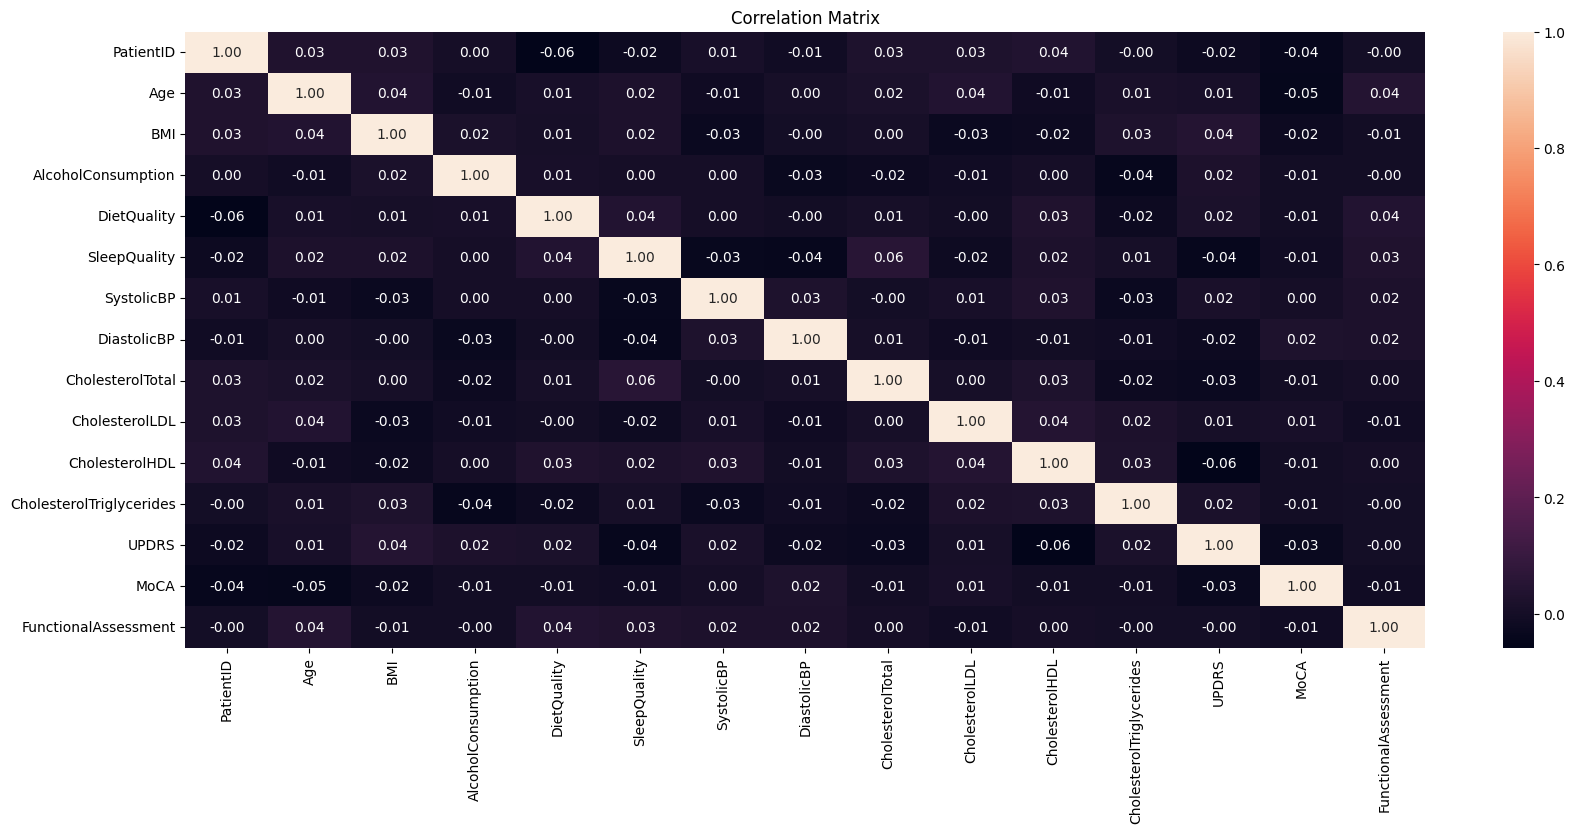

In [ ]:
plt.figure(figsize=(20, 8))

# Draw the heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

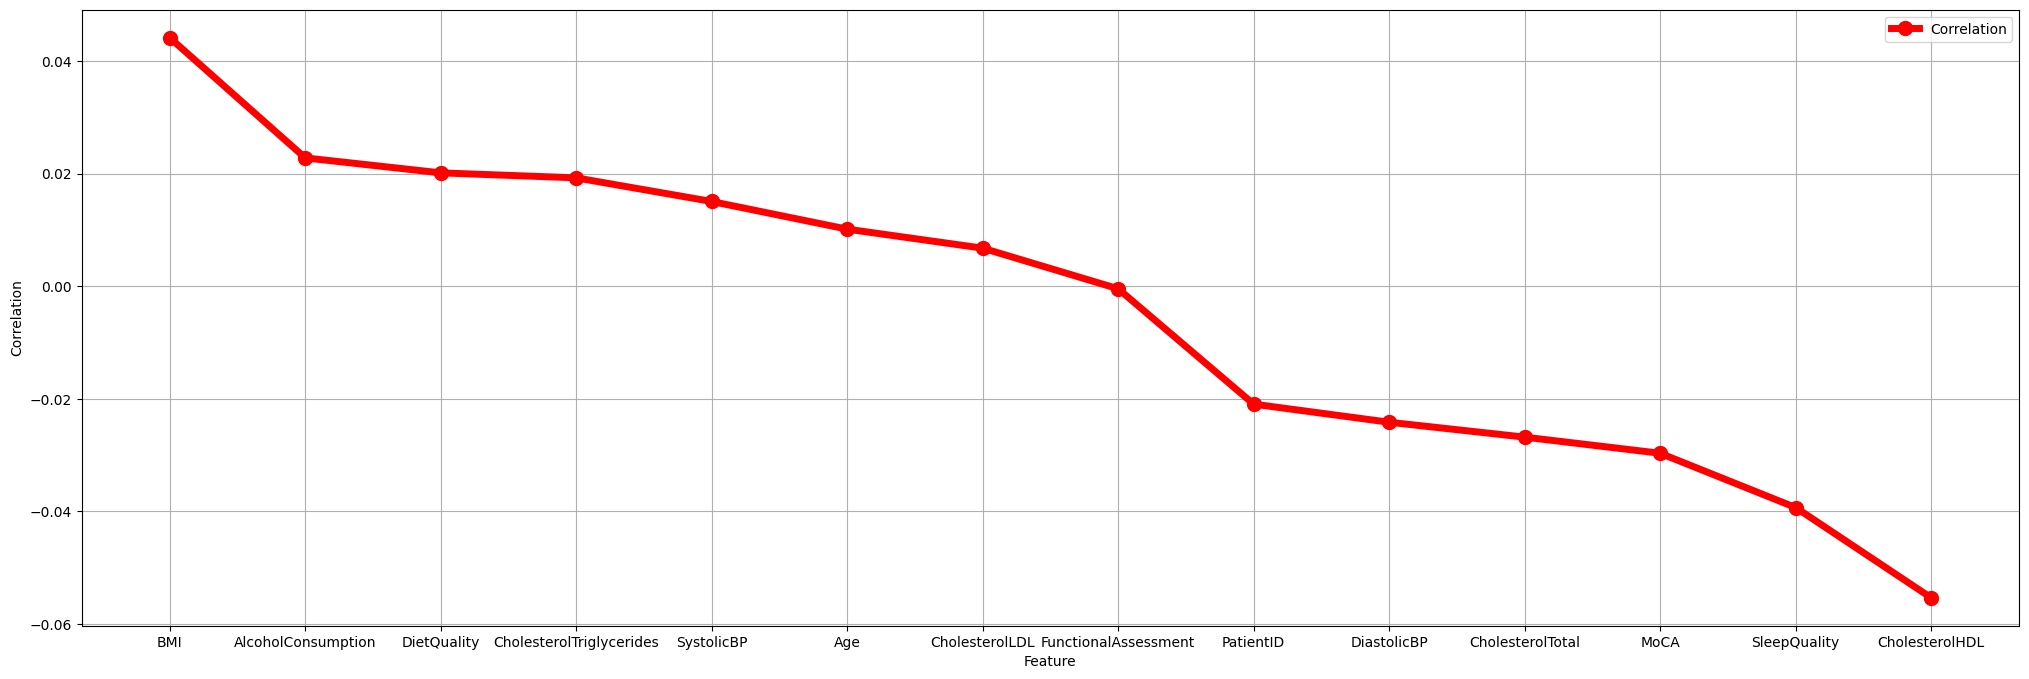

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(data.corr(numeric_only=True).UPDRS.sort_values(ascending=False)[1:],label="Correlation",c='r',lw=5,marker='o',ms=10)
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.show()

**What can we conclude from this HeatMap ? :>**



*   All numerical features have very low correlation with the target "UPDRS"
*   so, There importance is not high for our predictions

---
---



<ipython-input-62-3d8d86dced7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EducationLevel', y='UPDRS', data=edu_updrs, palette='viridis')


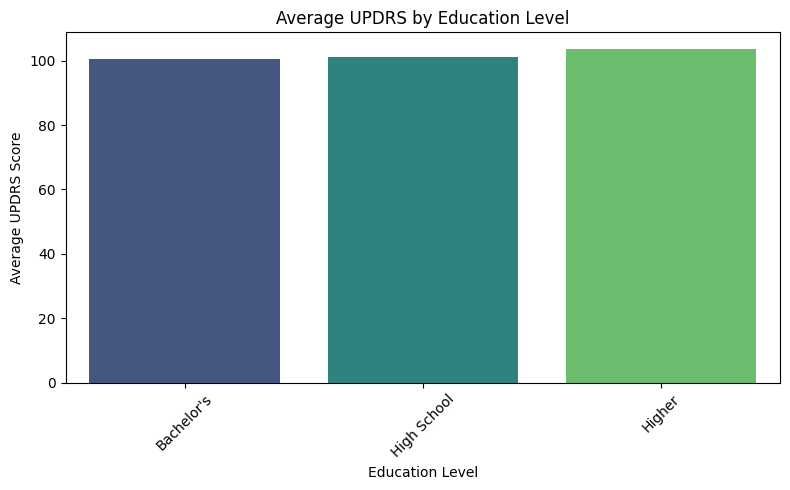

In [ ]:
# Calculate means
edu_updrs = data.groupby('EducationLevel')['UPDRS'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='EducationLevel', y='UPDRS', data=edu_updrs, palette='viridis')
plt.title('Average UPDRS by Education Level')
plt.ylabel('Average UPDRS Score')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**What can we conlude from this plot ? :>**



*   No strong correlation: Education level doesn’t seem to drastically affect the severity of Parkinson’s based on these scores. The variations are minor, and education might not be the most significant factor in determining disease severity.


*  in Addition for this the column contains about 20% of missing values (NULLS) so i prefer to get rid of this column in the preprocessing stage

---
---





<ipython-input-63-b321eedd3755>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=1`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, x=data[i],color='green',shade=1,edgecolor='black')
<ipython-input-63-b321eedd3755>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=1`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, x=data[i],color='green',shade=1,edgecolor='black')
<ipython-input-63-b321eedd3755>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=1`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, x=data[i],color='green',shade=1,edgecolor='black')
<ipython-input-63-b321eedd3755>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=1`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, x=data[i],color

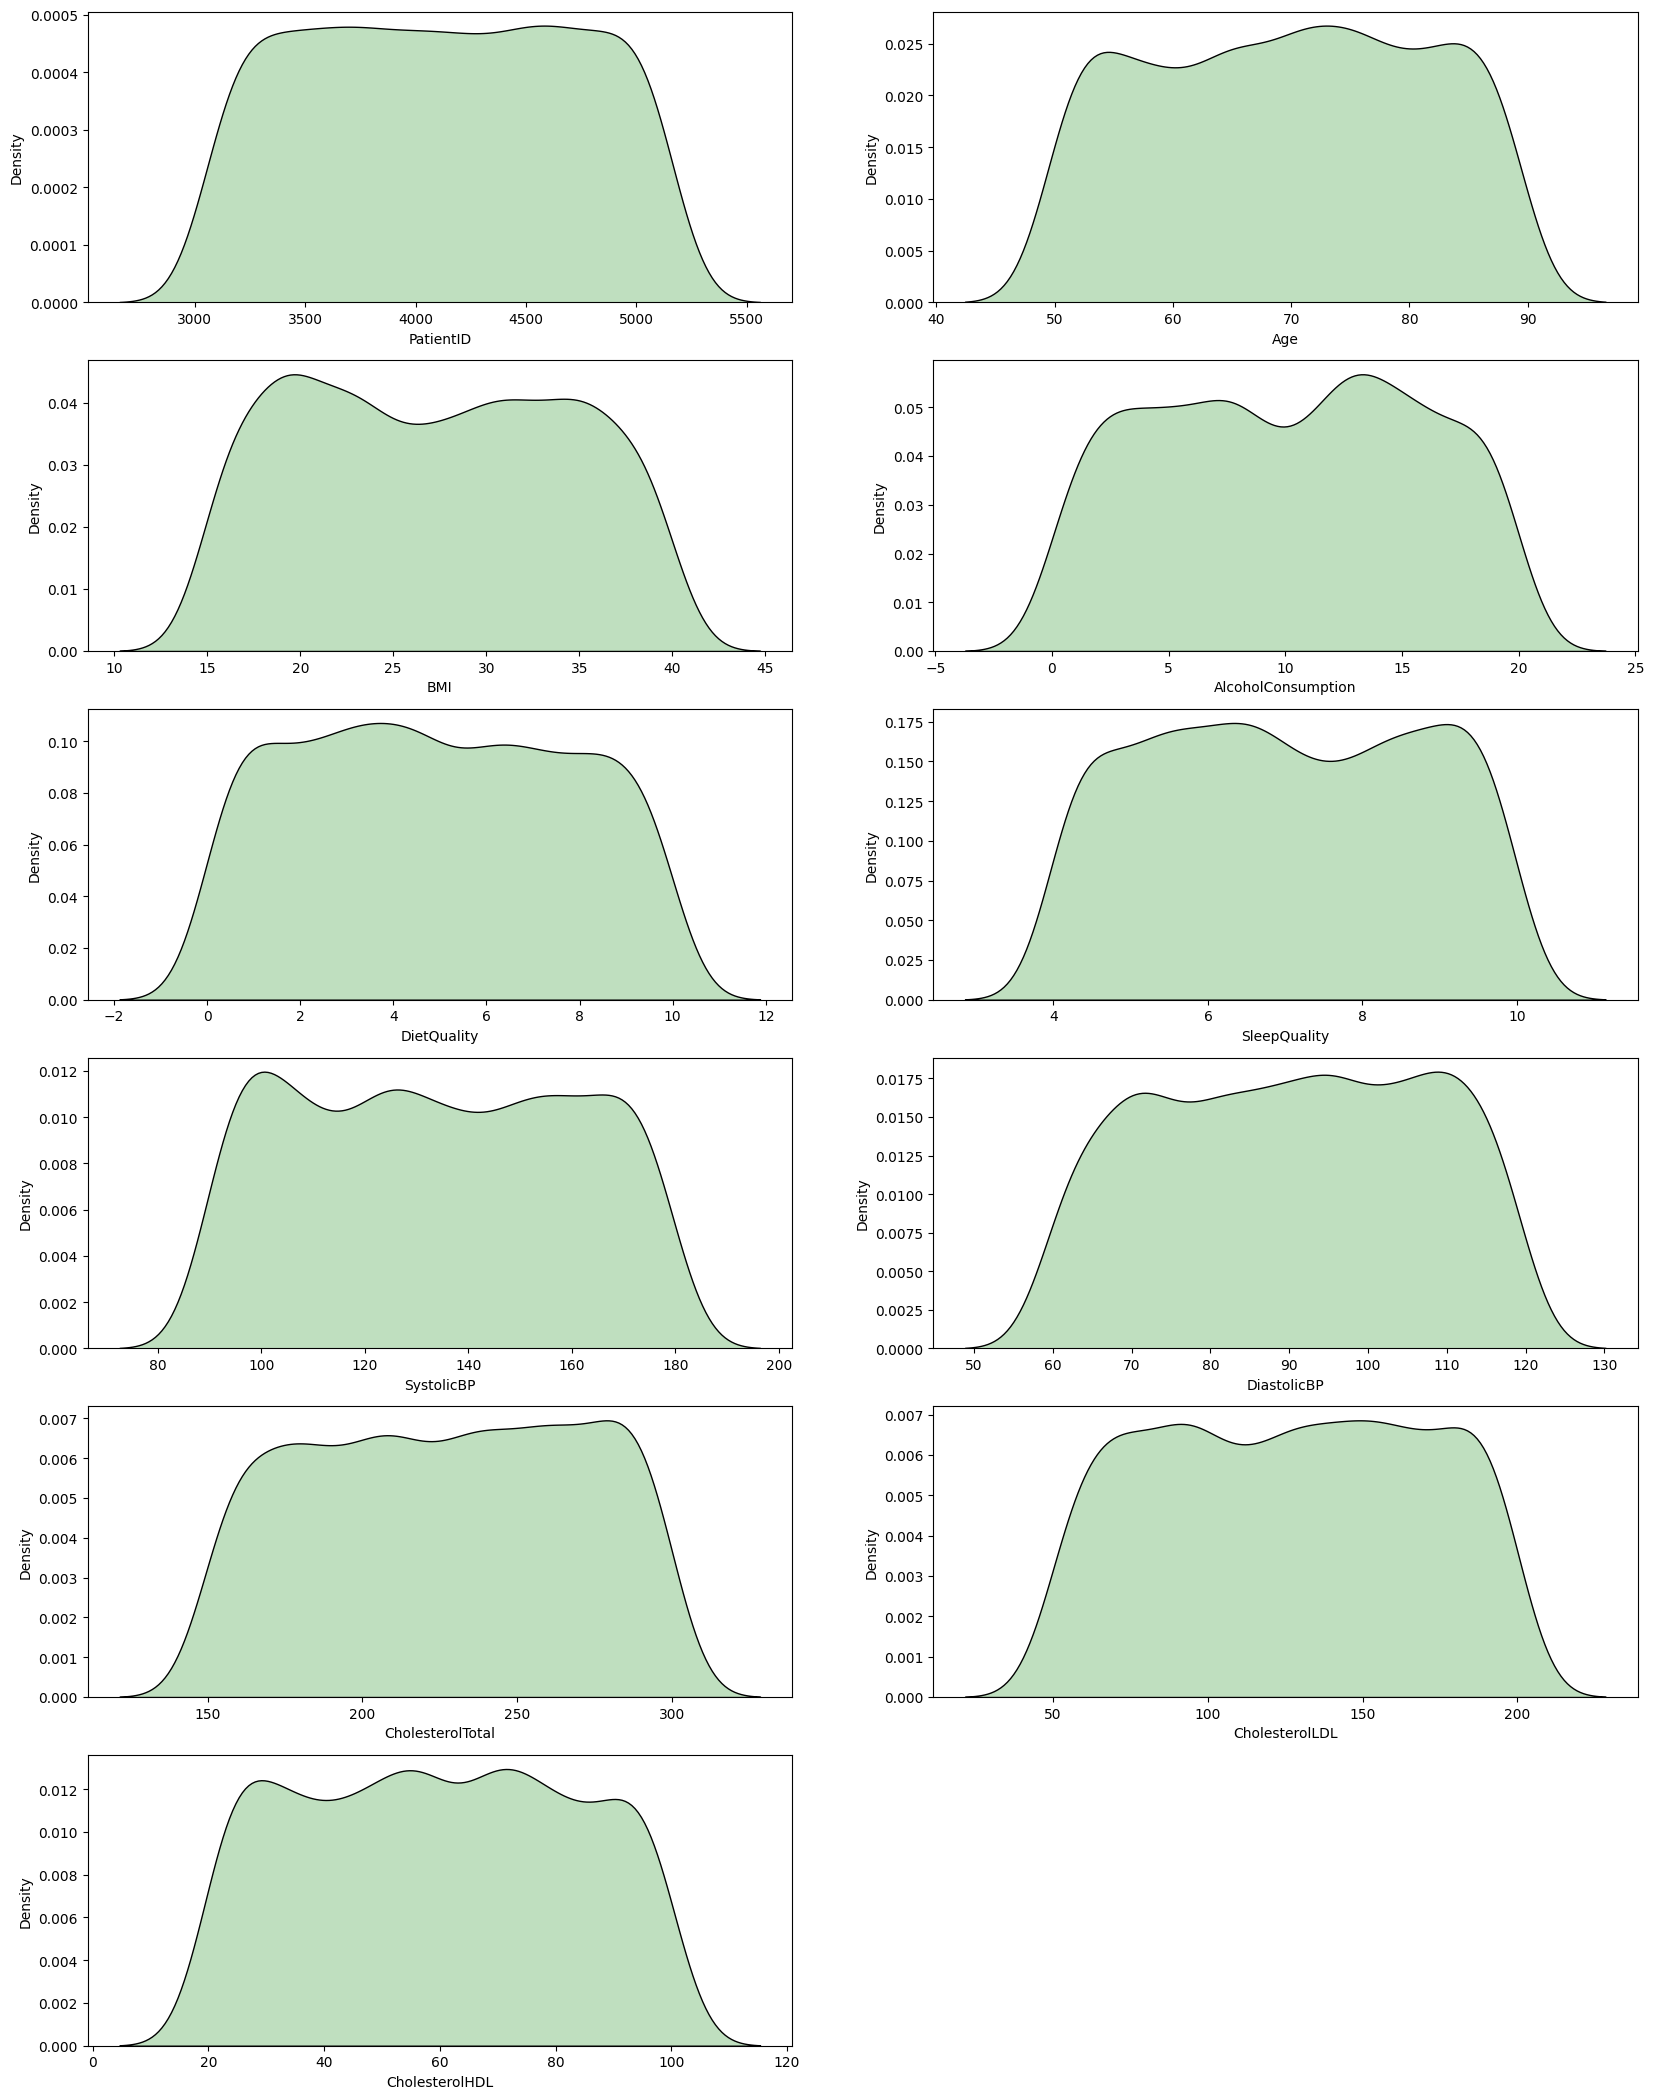

In [ ]:
plt.figure(figsize=(20,40))
plot=1
columns = data.select_dtypes(include='number').columns
for i in columns:
    if plot<12:
        plt.subplot(9,2,plot)
        sns.kdeplot(data, x=data[i],color='green',shade=1,edgecolor='black')
    plot+=1
plt.show()

**Data is normally distributed in the most of the columns**

---
---

In [ ]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'DoctorInCharge', 'WeeklyPhysicalActivity (hr)',
       'MedicalHistory', 'Symptoms'],
      dtype='object')

<ipython-input-65-7a5bb28753af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data,palette='Set1',edgecolor='black')


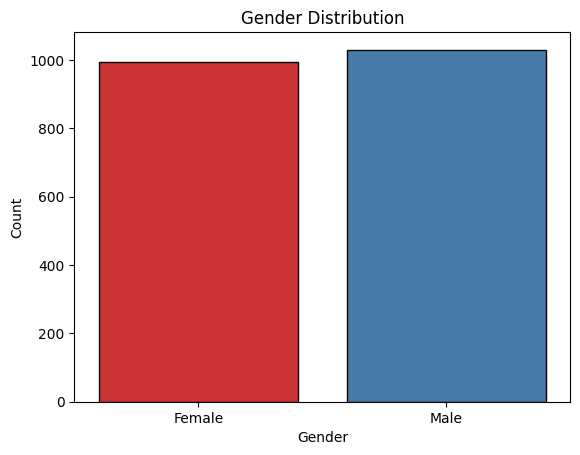

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=data,palette='Set1',edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Data seems that it's equally distributed between males and females**

---
---


<ipython-input-66-f9ae86db2049>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity', data=data,palette='Set2',edgecolor='black')


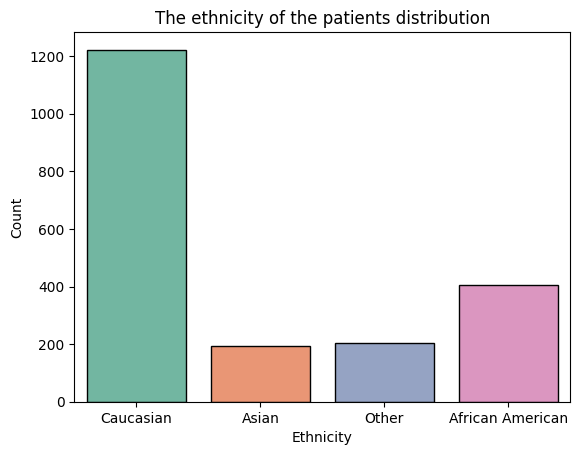

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Ethnicity', data=data,palette='Set2',edgecolor='black')
plt.title('The ethnicity of the patients distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()


**Most of patients are Caucasian**

---
---

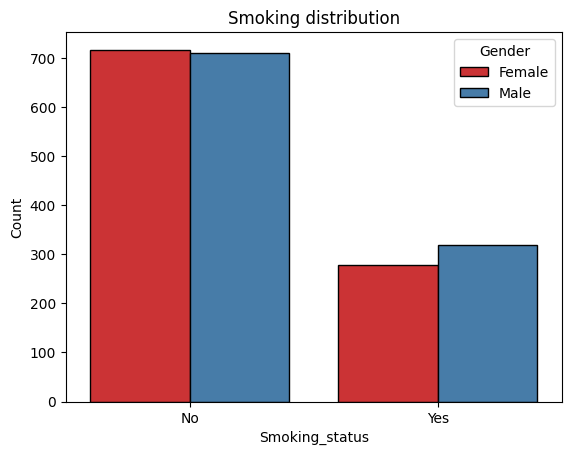

In [ ]:
sns.countplot(x='Smoking', data=data,hue='Gender',palette='Set1',edgecolor='black')
plt.title('Smoking distribution')
plt.xlabel('Smoking_status')
plt.ylabel('Count')
plt.show()

---
---


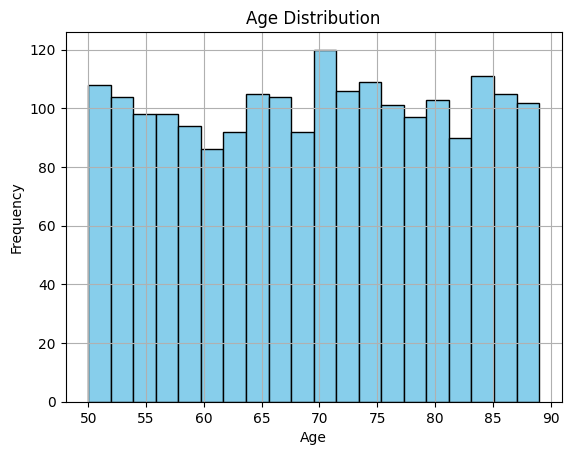

In [ ]:
data['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Data is slightly biased to age range from 68 to 72 years**

---
---

# **Preprocessing :>**

In [ ]:
# Converting the string into a real dictionary
data['MedicalHistory'] = data['MedicalHistory'].apply(ast.literal_eval)

# Expand the dictionary into separate columns
medical_columns = data['MedicalHistory'].apply(pd.Series)

# Merge with original DataFrame
data = pd.concat([data, medical_columns], axis=1)

# Optional: drop the original MedicalHistory column
data.drop(columns=['MedicalHistory'], inplace=True)



In [ ]:
# Converting the string into a real dictionary
data['Symptoms']=data['Symptoms'].apply(ast.literal_eval)

# Expand the dictionary into separate columns
symptoms_column = data['Symptoms'].apply(pd.Series)

# Merge with original DataFrame
data = pd.concat([data, symptoms_column], axis=1)

# Drop the original MedicalHistory column
data.drop(columns=['Symptoms'], inplace=True)


data.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,DoctorInCharge,WeeklyPhysicalActivity (hr),FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,3530,64,Female,Caucasian,NaN,31.243092,No,6.157042,4.331705,6.291197,112,91,214.074273,82.366509,25.542044,237.290807,4.161620,28.626480,5.355055,DrXXXConfid,04:14,No,No,No,No,No,No,No,No,No,No,Yes,No,No
1,4848,79,Male,Asian,Higher,32.964518,No,5.192872,5.793078,8.603542,124,76,271.105498,176.637077,23.098051,150.130321,176.220403,20.310768,9.927998,DrXXXConfid,00:59,No,No,No,No,Yes,No,No,No,No,No,No,No,No
2,4289,85,Male,Other,NaN,16.092385,No,9.920555,5.442308,8.894049,97,82,279.608808,198.444151,66.076197,66.871417,133.280607,20.614060,5.704308,DrXXXConfid,05:38,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes
3,4751,84,Female,Caucasian,High School,39.145792,Yes,18.875195,8.407833,8.300877,138,63,271.365480,134.669056,41.725854,248.163486,155.952027,4.237696,7.250435,DrXXXConfid,05:02,Yes,Yes,No,No,No,No,No,Yes,No,No,No,No,No
4,4242,59,Male,African American,NaN,15.987603,Yes,2.854129,5.797936,7.714292,169,101,293.662385,59.598420,23.251949,127.747693,49.523001,21.475758,6.119130,DrXXXConfid,00:08,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes


In [ ]:
# Checking OUTLIERS

columns = data.select_dtypes(include='number').columns
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( data[col] < lower) | (data[col] > upper))
    index_label = data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')



Number of outliers in PatientID: 0
Number of outliers in Age: 0
Number of outliers in BMI: 0
Number of outliers in AlcoholConsumption: 0
Number of outliers in DietQuality: 0
Number of outliers in SleepQuality: 0
Number of outliers in SystolicBP: 0
Number of outliers in DiastolicBP: 0
Number of outliers in CholesterolTotal: 0
Number of outliers in CholesterolLDL: 0
Number of outliers in CholesterolHDL: 0
Number of outliers in CholesterolTriglycerides: 0
Number of outliers in UPDRS: 0
Number of outliers in MoCA: 0
Number of outliers in FunctionalAssessment: 0


In [ ]:
conditions = [
    (data['UPDRS'] <= 49),
    (data['UPDRS'] > 49) & (data['UPDRS'] <= 100),
    (data['UPDRS'] > 100)
]
choices = ['Not Affected','Moderate', 'Severe']

data['UPDRS_Category'] = np.select(conditions, choices, default='Unknown')

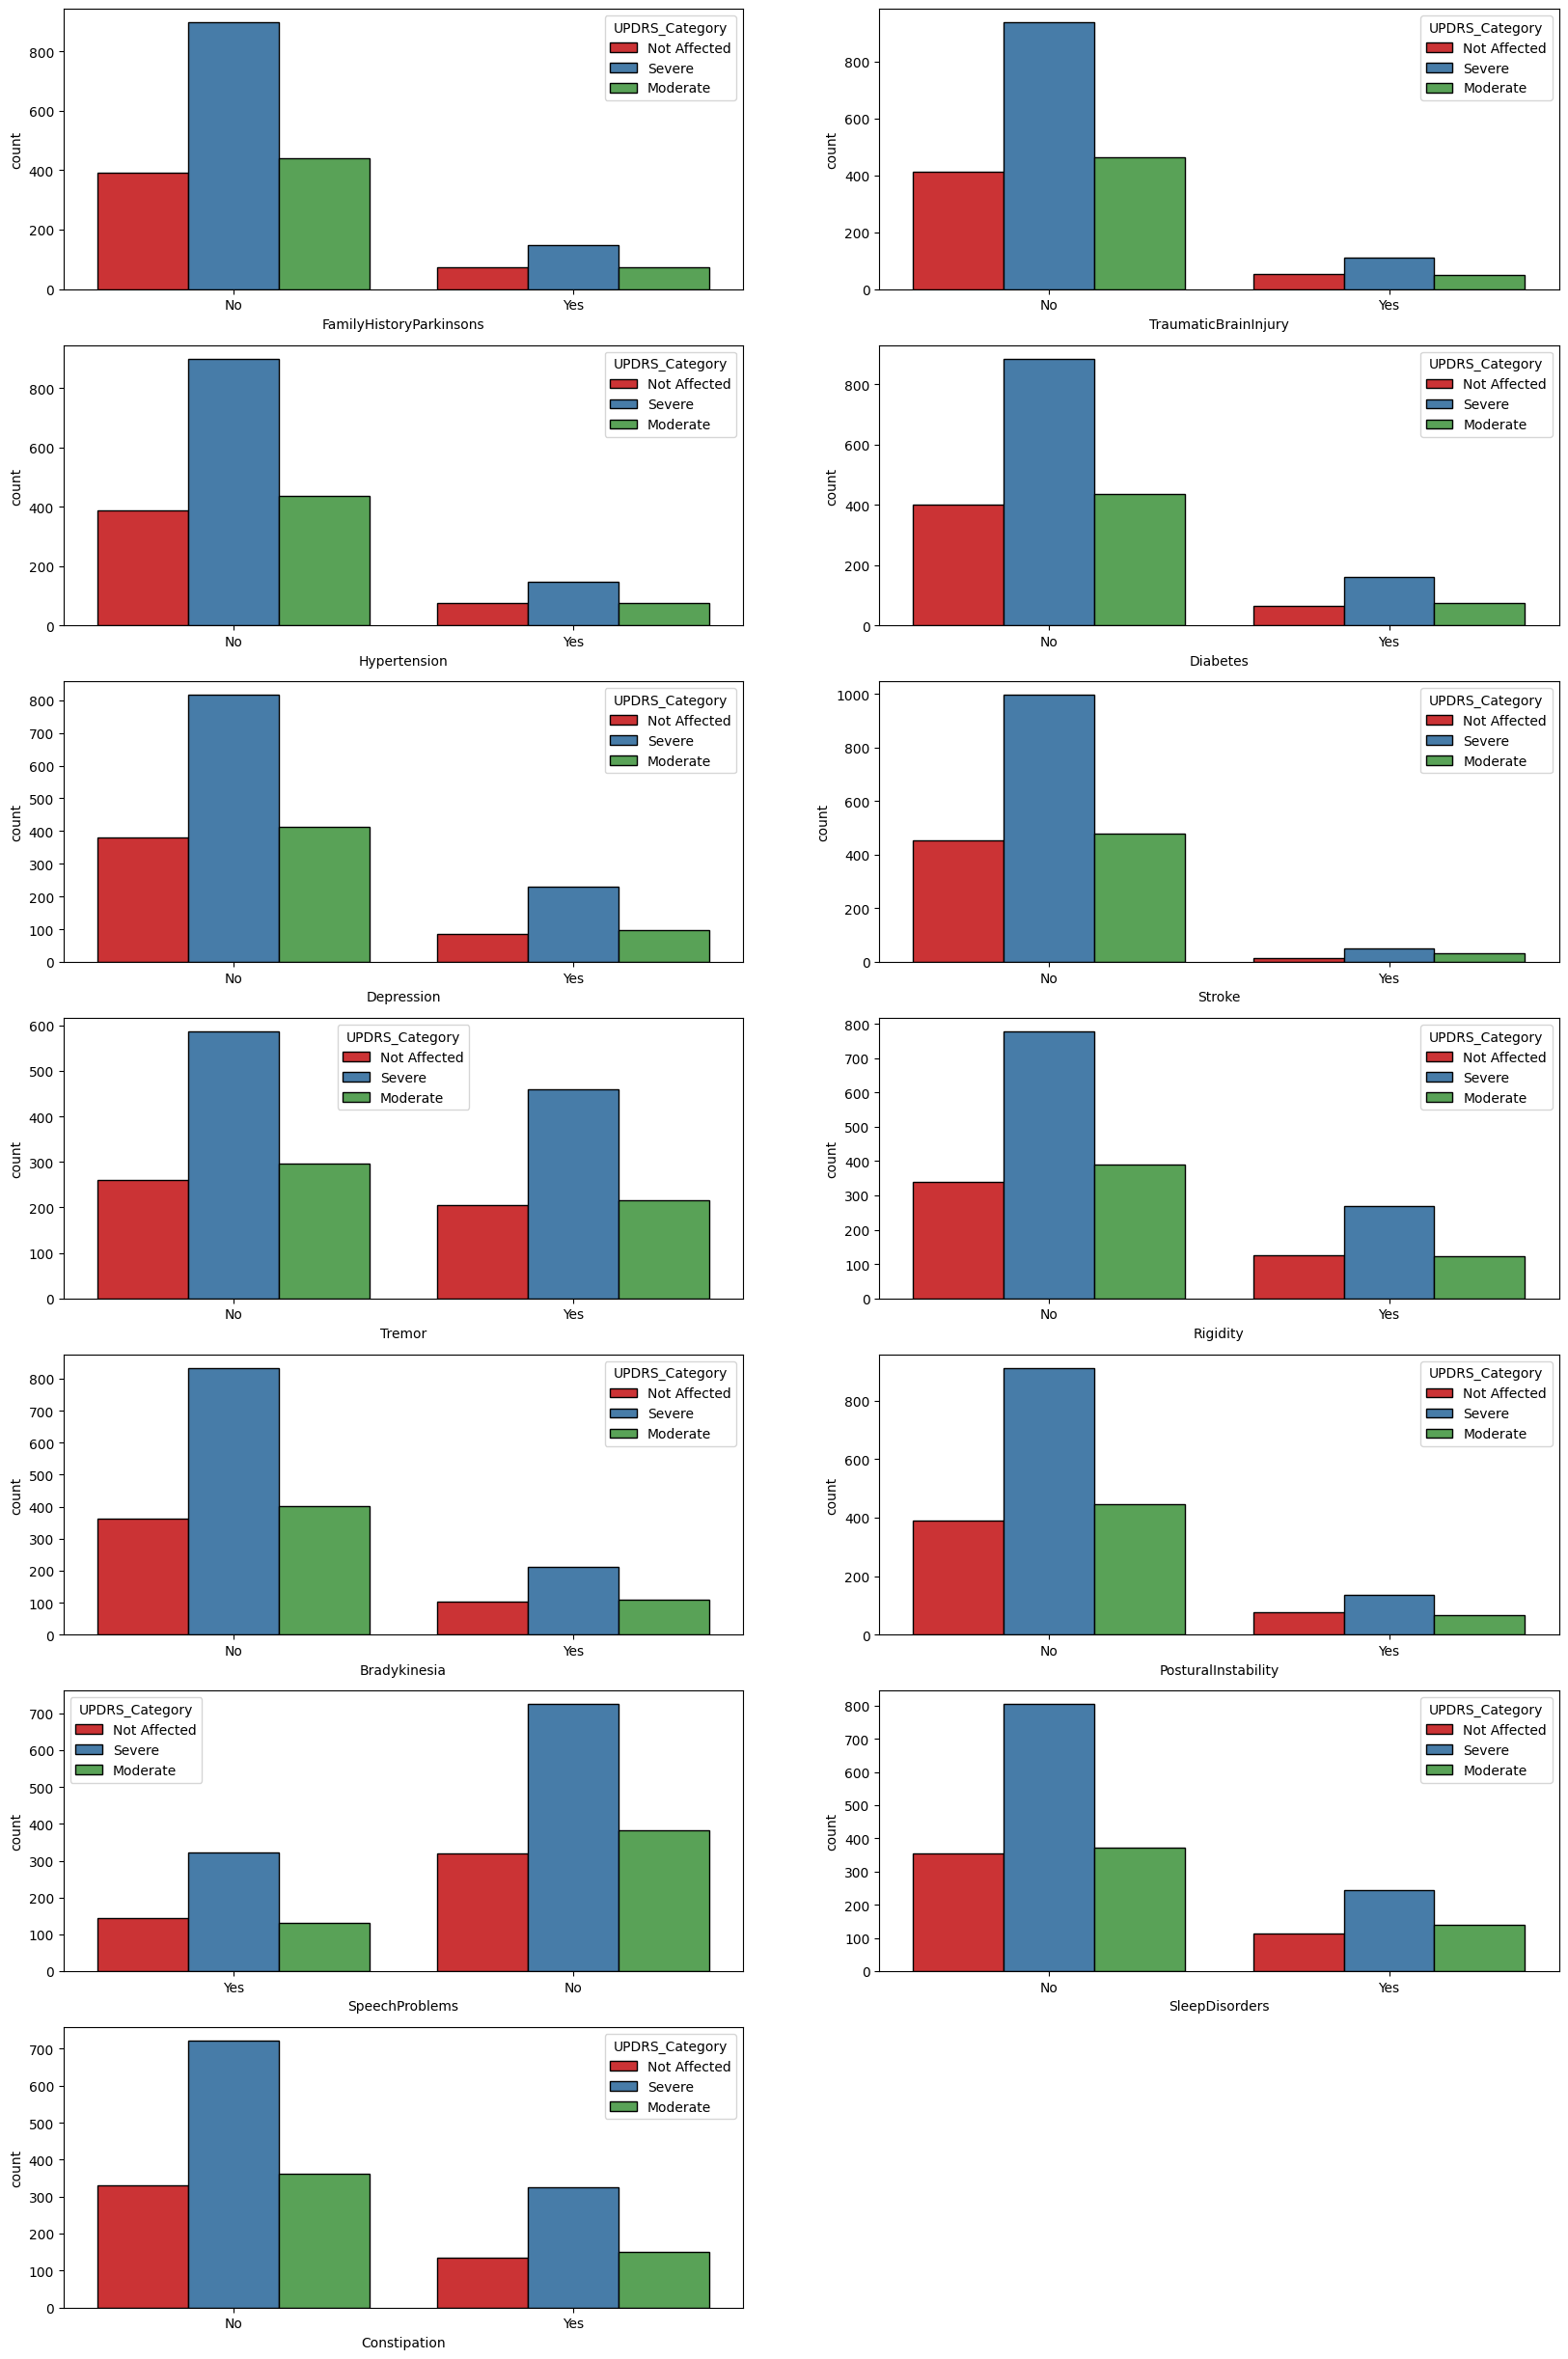

In [ ]:
plt.figure(figsize=(20,40))
plot=1
columns = data[['FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity',
       'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
       'SleepDisorders', 'Constipation']]
for i in columns:
    if plot<14:
        plt.subplot(9,2,plot)
        sns.countplot(x=i, data=data,hue='UPDRS_Category',palette='Set1',edgecolor='black')
    plot+=1
plt.show()

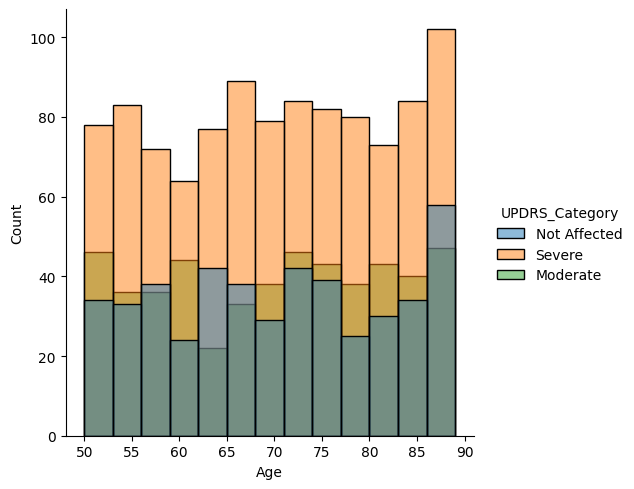

In [ ]:
sns.displot(data=data,x='Age',hue='UPDRS_Category',kind='hist',color='Set2')
plt.show()

In [ ]:
# Convert HH:MM to number of minutes only
def convert_to_minutes(time_str):
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

data['WeeklyPhysicalActivity (hr)'] = data['WeeklyPhysicalActivity (hr)'].apply(convert_to_minutes)


In [ ]:
data.dtypes

,0
PatientID,int64
Age,int64
Gender,object
Ethnicity,object
EducationLevel,object
BMI,float64
Smoking,object
AlcoholConsumption,float64
DietQuality,float64
SleepQuality,float64


In [ ]:
object_columns = data.select_dtypes(include='object').columns.tolist()
object_columns

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'DoctorInCharge',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation',
 'UPDRS_Category']

**Dropping columns : :**

In [ ]:
data.drop(columns=['PatientID','EducationLevel','DoctorInCharge'],inplace=True,axis=1)

**Scaling Data : :**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Make a copy
df_encoded = data.copy()

# Separate target
target = df_encoded['UPDRS']

# Identify only numeric feature columns (excluding target)
numeric_features = df_encoded.drop('UPDRS', axis=1).select_dtypes(include=['number']).columns

# Apply log transformation (add small value to avoid log(0) issues)
df_encoded[numeric_features] = np.log1p(df_encoded[numeric_features])

# Create standard scaler
scaler = StandardScaler()

# Apply scaling ONLY on numeric features
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Put back the target if needed (in case you dropped it earlier)
df_encoded['UPDRS'] = target

# Update original dataframe
data[df_encoded.columns] = df_encoded

# Check the result
pd.set_option('display.max_columns', None)
data.head()


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,WeeklyPhysicalActivity (hr),FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,UPDRS_Category
0,-0.415335,Female,Caucasian,0.635647,No,-0.345154,0.091727,-0.300508,-0.773942,0.139712,-0.193449,-0.944419,-1.682547,0.352738,4.161620,1.096667,0.354438,0.125158,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Not Affected
1,0.824127,Male,Asian,0.830126,No,-0.551209,0.488808,0.915787,-0.274667,-0.783588,0.993742,1.061372,-1.902764,-0.479979,176.220403,0.663360,1.231016,-1.412617,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Severe
2,1.255831,Male,Other,-1.737430,No,0.256571,0.401899,1.047374,-1.478486,-0.394338,1.149060,1.368385,0.430954,-1.943940,133.280607,0.681946,0.440950,0.427774,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,Severe
3,1.186014,Female,Caucasian,1.455303,Yes,1.109318,1.022611,0.774390,0.250500,-1.742885,0.998562,0.346750,-0.597245,0.434332,155.952027,-1.182329,0.776518,0.308458,Yes,Yes,No,No,No,No,No,Yes,No,No,No,No,No,Severe
4,-0.893134,Male,African American,-1.760422,Yes,-1.226562,0.489980,0.486750,1.246440,0.674987,1.395722,-1.790164,-1.888251,-0.773105,49.523001,0.733362,0.538032,-3.428864,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Moderate


**Encoding Data : :**



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Label Encoding for all categorical columns except 'Ethnicity'
label_encoder = LabelEncoder()

for col in categorical_columns:
    if col != 'Ethnicity':
        data[col] = label_encoder.fit_transform(data[col].astype(str))  # Convert to str to avoid errors with non-string data

# Apply One-Hot Encoding for the 'Ethnicity' column
data['Ethnicity'] = data['Ethnicity'].astype(str)

# Now apply pd.get_dummies() for one-hot encoding
data = pd.get_dummies(data, columns=['Ethnicity'], drop_first=True,dtype=int)

# Now your dataframe has Label Encoded columns, and One-Hot Encoded 'Ethnicity'
data.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,WeeklyPhysicalActivity (hr),FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,UPDRS_Category,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,-0.415335,0,0.635647,0,-0.345154,0.091727,-0.300508,-0.773942,0.139712,-0.193449,-0.944419,-1.682547,0.352738,4.161620,1.096667,0.354438,0.125158,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0.824127,1,0.830126,0,-0.551209,0.488808,0.915787,-0.274667,-0.783588,0.993742,1.061372,-1.902764,-0.479979,176.220403,0.663360,1.231016,-1.412617,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0
2,1.255831,1,-1.737430,0,0.256571,0.401899,1.047374,-1.478486,-0.394338,1.149060,1.368385,0.430954,-1.943940,133.280607,0.681946,0.440950,0.427774,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,1
3,1.186014,0,1.455303,1,1.109318,1.022611,0.774390,0.250500,-1.742885,0.998562,0.346750,-0.597245,0.434332,155.952027,-1.182329,0.776518,0.308458,1,1,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0
4,-0.893134,1,-1.760422,1,-1.226562,0.489980,0.486750,1.246440,0.674987,1.395722,-1.790164,-1.888251,-0.773105,49.523001,0.733362,0.538032,-3.428864,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


# **Feature Engineer : :**

**They are not usefull logically and at the model in the prediction of UPDRS**

In [ ]:
#  Create Binary Count of Symptoms Present (Yes/No)
#data['NumSymptoms'] = data[['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'Constipation']].apply(lambda x: (x == 'Yes').sum(), axis=1)

#  Interaction Features: Age with Symptoms (for example)
#data['AgeTremorInteraction'] = data['Age'] * data['Tremor'].apply(lambda x: 1 if x == 'Yes' else 0)
#data['AgeRigidityInteraction'] = data['Age'] * data['Rigidity'].apply(lambda x: 1 if x == 'Yes' else 0)

#  Interaction Features: BMI with Symptoms
#data['BMI_TremorInteraction'] = data['BMI'] * data['Tremor'].apply(lambda x: 1 if x == 'Yes' else 0)
#data['BMI_RigidityInteraction'] = data['BMI'] * data['Rigidity'].apply(lambda x: 1 if x == 'Yes' else 0)

#  Combine Blood Pressure and Cholesterol (e.g., ratio or other metrics)
#data['BloodPressure'] = data['SystolicBP'] / (data['DiastolicBP'] + 1)  # Added 1 to avoid division by 0
#data['CholesterolBalance'] = data['CholesterolLDL'] / (data['CholesterolHDL'] + 1)


# **Feature Selection :>**

In [ ]:
# Define the feature matrix X and the target y
data.drop(columns='UPDRS_Category',axis=1,inplace=True)
X = data.drop(columns='UPDRS')
y = data['UPDRS']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

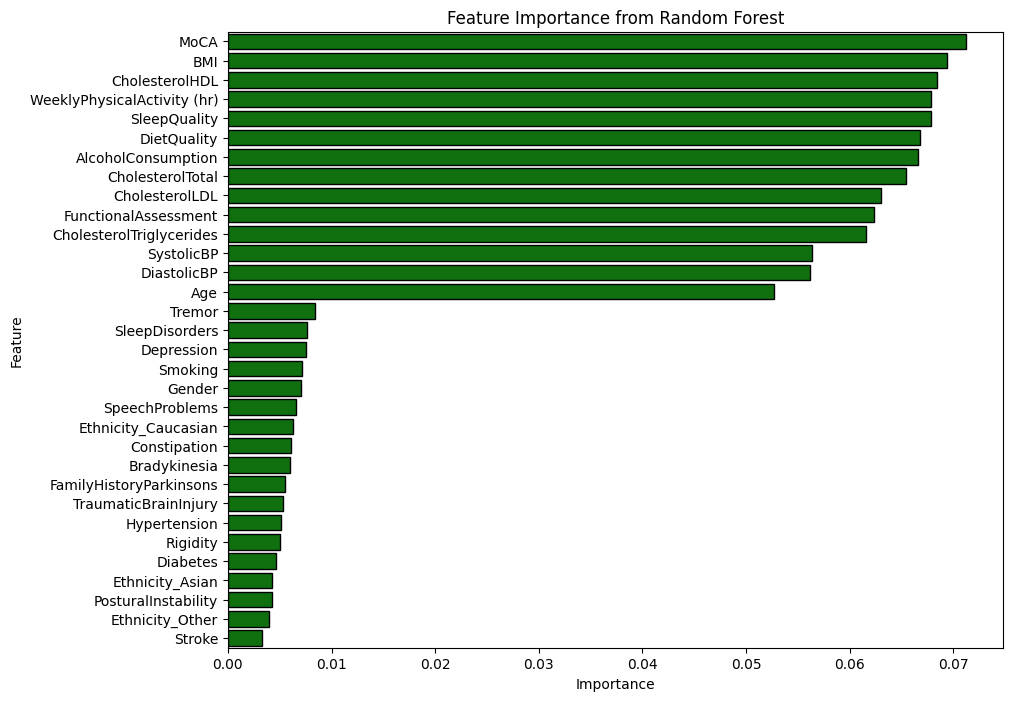

In [ ]:

from sklearn.ensemble import RandomForestRegressor


# Create a random forest classifier
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
selecting_features = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': selecting_features
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='g',edgecolor='black')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Choose top 10 best features (you can change k)
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Selected Features:")
print(selected_features)


Top Selected Features:
Index(['Gender', 'BMI', 'DietQuality', 'SleepQuality', 'CholesterolTotal',
       'CholesterolHDL', 'WeeklyPhysicalActivity (hr)', 'Hypertension',
       'Depression', 'PosturalInstability'],
      dtype='object')


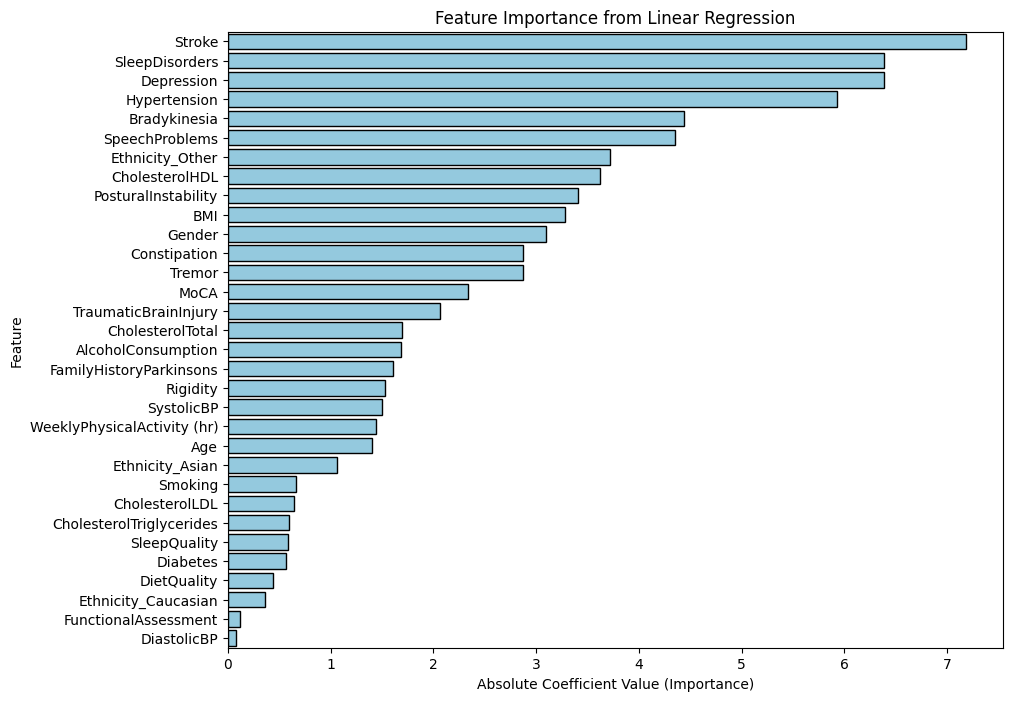

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get the feature coefficients
selecting_features = lr.coef_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(selecting_features)  # Take absolute value
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='skyblue', edgecolor='black')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Absolute Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.show()


# **Machine Learning Models :>**

In [ ]:
data_x = data[['WeeklyPhysicalActivity (hr)','CholesterolHDL','BMI','AlcoholConsumption','CholesterolTotal',
              'SleepQuality','FunctionalAssessment','CholesterolLDL','DietQuality' ,'CholesterolTriglycerides','SystolicBP'
              ,'MoCA','DiastolicBP','Age']]

Y = data['UPDRS']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.3,shuffle=True,random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
def linear(X_train, y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)


    # Making predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    #accuracy = accuracy_score(y_test, y_pred)
    print("linear regression:")
    print("MSE: ", mse)
    print("r2_score test:",metrics.r2_score(y_test,y_pred))
    print("r2_score train:",metrics.r2_score(y_train,y_pred_train))


    return mse

In [ ]:
LR = linear(X_train, y_train , X_test, y_test)

linear regression:
MSE:  3395.158212811388
r2_score test: 0.001986759614356459
r2_score train: 0.010180194223667893


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def poly(degree , X_train , y_train , X_test , y_test):

    poly_features = PolynomialFeatures(degree)
    X_train_poly = poly_features.fit_transform(X_train)

    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    ypred=poly_model.predict(poly_features.transform(X_test))


    # predicting on test data-set
    y_pred = poly_model.predict(poly_features.fit_transform(X_test))

    mse = mean_squared_error(y_test, y_pred)
    print("Polynomial regression:")
    print("MSE: ", mse)
    print("r2_score test:",metrics.r2_score(y_test,y_pred))
    print("r2_score train:",metrics.r2_score(y_train,y_train_predicted))
    return mse

In [ ]:
poly(3, X_train, y_train , X_test, y_test)

Polynomial regression:
MSE:  8006.871016686946
r2_score test: -1.3536350260675039
r2_score train: 0.4577310176645851


8006.871016686946

In [ ]:
data_x = data[['CholesterolHDL','SleepQuality','MoCA',"Depression",'PosturalInstability']]


Y = data['UPDRS']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.3,shuffle=True,random_state=40)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(max_depth=3 ,max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators = 200)
rf_regressor.fit(X_train, y_train)


# Predicting on the test set
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)
print("Random forest:")
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("r2_score_test:",metrics.r2_score(y_test,y_pred))
print("r2_score_train:",metrics.r2_score(y_train,y_train_pred))

Random forest:
MSE: 3381.828858206412
r2_score_test: 0.005904948855542269
r2_score_train: 0.03890749207604216


In [ ]:
# from sklearn.linear_model import Ridge

# ridge_model = Ridge(alpha=1.0)  # alpha = penalty strength
# ridge_model.fit(X_train, y_train)

# y_pred = ridge_model.predict(X_test)
# y_train_pred = ridge_model.predict(X_train)

# print("Ridge Regression:")
# print("MSE:", round(metrics.mean_squared_error(y_test, y_pred), 4))
# print("r2_score_test:", round(metrics.r2_score(y_test, y_pred), 4))
# print("r2_score_train:", round(metrics.r2_score(y_train, y_train_pred), 4))


Ridge Regression:
MSE: 3361.7645
r2_score_test: 0.0118
r2_score_train: 0.0074


In [ ]:
# from sklearn.linear_model import Lasso

# lasso_model = Lasso(alpha=0.1)  # alpha = penalty strength
# lasso_model.fit(X_train, y_train)

# y_pred = lasso_model.predict(X_test)
# y_train_pred = lasso_model.predict(X_train)

# print("Lasso Regression:")
# print("MSE:", round(metrics.mean_squared_error(y_test, y_pred), 4))
# print("r2_score_test:", round(metrics.r2_score(y_test, y_pred), 4))
# print("r2_score_train:", round(metrics.r2_score(y_train, y_train_pred), 4))


Lasso Regression:
MSE: 3364.1117
r2_score_test: 0.0111
r2_score_train: 0.0074
